# Code Challenge

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# a) Generating a dataset. 

Use make_moons to simulate a data set: 
```python
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
```
After you have generated it, check the shape, print out some rows of it and also do a plot: 

```python
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data generated by make_moons() function')
```

In [3]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [ ]:
X.shape

In [ ]:
list(y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data generated by make_moons() function')

In [4]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
y_train

In [5]:
sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# b) Now you will do some modelling from beginning to end meaning that you will have to decide how to split your data, what model to use and so on. 
# Create 1 deep learning model. Try to tune hyperparameters; either through using a scikit-learn wrapper (see coursebook p.320 - p.322) or KerasTuner: https://keras.io/keras_tuner/ .
# Create 1 model with Scikit-learn. 
# Write down a short summary of your conclusions. 

In [24]:
def build_model():
    model = Sequential()
    model.add(Dense(30, input_shape=(30,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
#pip install scikeras

In [25]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [26]:
keras_class = KerasClassifier(model=build_model, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(keras_class, X, y, cv=kfold)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mirak\AppData\Local\Temp\__autograph_generated_file_xz7y2oh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_16" is incompatible with the layer: expected shape=(None, 30), found shape=(5, 2)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mirak\AppData\Local\Temp\__autograph_generated_file_xz7y2oh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_17" is incompatible with the layer: expected shape=(None, 30), found shape=(5, 2)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mirak\AppData\Local\Temp\__autograph_generated_file_xz7y2oh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_18" is incompatible with the layer: expected shape=(None, 30), found shape=(5, 2)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mirak\AppData\Local\Temp\__autograph_generated_file_xz7y2oh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_19" is incompatible with the layer: expected shape=(None, 30), found shape=(5, 2)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mirak\AppData\Local\Temp\__autograph_generated_file_xz7y2oh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_20" is incompatible with the layer: expected shape=(None, 30), found shape=(5, 2)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mirak\AppData\Local\Temp\__autograph_generated_file_xz7y2oh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_21" is incompatible with the layer: expected shape=(None, 30), found shape=(5, 2)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mirak\AppData\Local\Temp\__autograph_generated_file_xz7y2oh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_22" is incompatible with the layer: expected shape=(None, 30), found shape=(5, 2)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mirak\AppData\Local\Temp\__autograph_generated_file_xz7y2oh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_23" is incompatible with the layer: expected shape=(None, 30), found shape=(5, 2)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mirak\AppData\Local\Temp\__autograph_generated_file_xz7y2oh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_24" is incompatible with the layer: expected shape=(None, 30), found shape=(5, 2)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mirak\AppData\Local\Temp\__autograph_generated_file_xz7y2oh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mirak\anaconda3\envs\dl_lection3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_25" is incompatible with the layer: expected shape=(None, 30), found shape=(5, 2)



In [ ]:
y_pred = keras_reg.predict(X_test)

In [27]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(200,100,50,1),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 50, 1), max_iter=300)

In [28]:
y_pred = mlp_clf.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.51


In [29]:
param_grid = {
    'hidden_layer_sizes': [(100,100),(100,50),(100,100,50),(100,50,50)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [30]:
#10 minutes
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'adam'}


In [32]:
grid_predictions = grid.predict(X_test_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.87


In [31]:
n_cols = X_train.shape[1]
n_cols

2

In [33]:
model_1 = Sequential()
model_1.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
model_1.add(Dense(50, activation = 'relu'))
model_1.add(Dense(1, activation = 'sigmoid'))
#Activation layer på output layer
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_1_trained = model_1.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1302 - accuracy: 0.8259 - val_loss: 0.1191 - val_accuracy: 0.8331
Epoch 2/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1128 - accuracy: 0.8427 - val_loss: 0.1127 - val_accuracy: 0.8444
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.8519 - val_loss: 0.1065 - val_accuracy: 0.8556
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.8581 - val_loss: 0.1027 - val_accuracy: 0.8594
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.8619 - val_loss: 0.1022 - val_accuracy: 0.8594
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.8647 - val_loss: 0.1008 - val_accuracy: 0.8581
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.8627 - val_loss: 0.1016 - val_accuracy: 0.8587
Epoch 

In [34]:
y_pred_m1 = model_1.predict(X_test)
_, train_acc_m1 = model_1.evaluate(X_train, y_train)
_, test_acc_m1 = model_1.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m1, y_test))
print('Train: %.3f' % (train_acc_m1))
print('Test: %.3f' % (test_acc_m1))
#np.max(y_pred_m1)

63/63 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.8720
0.0924536844963499
Train: 0.861
Test: 0.872


In [35]:
print(mean_squared_error(y_pred_m1, y_test))

0.0924536844963499


In [36]:
model_2 = Sequential()
model_2.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
#model_2.add(keras.layers.Dropout(0.50))
model_2.add(Dense(100, activation = 'relu'))
model_2.add(Dense(10, activation = 'relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

model_2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience = 2)
model_2_trained = model_2.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.8305 - val_loss: 0.1135 - val_accuracy: 0.8444
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.8502 - val_loss: 0.1066 - val_accuracy: 0.8550
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.8577 - val_loss: 0.1021 - val_accuracy: 0.8600
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.8605 - val_loss: 0.1017 - val_accuracy: 0.8575
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.8644 - val_loss: 0.1053 - val_accuracy: 0.8587
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.8619 - val_loss: 0.1016 - val_accuracy: 0.8594
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.8637 - val_loss: 0.1029 - val_accuracy: 0.8600
Epoch 

In [37]:
y_pred_m2 = model_2.predict(X_test)
print(y_pred_m2)
_, train_acc_m2 = model_2.evaluate(X_train, y_train)
_, test_acc_m2 = model_2.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m2, y_test))
print('Train: %.3f' % (train_acc_m2))
print('Test: %.3f' % (test_acc_m2))

63/63 [==============================] - 0s 1ms/step
[[0.9650215 ]
 [0.8762981 ]
 [0.00880385]
 ...
 [0.09914368]
 [0.01028484]
 [0.4007004 ]]
63/63 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.8740
0.09271442435586258
Train: 0.862
Test: 0.874


In [38]:
print(mean_squared_error(y_pred_m2, y_test))

0.09271442435586258


In [39]:
model_3 = Sequential()
model_3.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
model_3.add(Dense(100, activation = 'relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

model_3.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_3_trained = model_3.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.1262 - accuracy: 0.8303 - val_loss: 0.1169 - val_accuracy: 0.8344
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.8448 - val_loss: 0.1088 - val_accuracy: 0.8487
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.8564 - val_loss: 0.1037 - val_accuracy: 0.8594
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.8578 - val_loss: 0.1023 - val_accuracy: 0.8587
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.8641 - val_loss: 0.1019 - val_accuracy: 0.8587
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.8644 - val_loss: 0.1011 - val_accuracy: 0.8612
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.8631 - val_loss: 0.1011 - val_accuracy: 0.8587
Epoch 

In [40]:
y_pred_m3 = model_3.predict(X_test)
print(y_pred_m3)
_, train_acc_m3 = model_3.evaluate(X_train, y_train)
_, test_acc_m3 = model_3.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m3, y_test))
print('Train: %.3f' % (train_acc_m3))
print('Test: %.3f' % (test_acc_m3))

63/63 [==============================] - 0s 940us/step
[[0.978299  ]
 [0.9513228 ]
 [0.00675135]
 ...
 [0.11209561]
 [0.0136988 ]
 [0.45718002]]
63/63 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.8715
0.09127968704161711
Train: 0.863
Test: 0.872


In [41]:
print(mean_squared_error(y_pred_m3, y_test))

0.09127968704161711


In [42]:
model_4 = Sequential()
model_4.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_4.add(Dense(100, activation = 'relu'))
model_4.add(Dense(1, activation = 'sigmoid'))

model_4.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_4_trained = model_4.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.1254 - accuracy: 0.8266 - val_loss: 0.1153 - val_accuracy: 0.8356
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.8472 - val_loss: 0.1075 - val_accuracy: 0.8544
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.8578 - val_loss: 0.1044 - val_accuracy: 0.8569
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.8619 - val_loss: 0.1041 - val_accuracy: 0.8575
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.8603 - val_loss: 0.1018 - val_accuracy: 0.8594
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.8570 - val_loss: 0.1016 - val_accuracy: 0.8600
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.8611 - val_loss: 0.1012 - val_accuracy: 0.8581
Epoch 

In [43]:
y_pred_m4 = model_4.predict(X_test)
print(y_pred_m4)
_, train_acc_m4 = model_4.evaluate(X_train, y_train)
_, test_acc_m4 = model_4.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m4, y_test))
print('Train: %.3f' % (train_acc_m4))
print('Test: %.3f' % (test_acc_m4))

63/63 [==============================] - 0s 952us/step
[[0.9680178 ]
 [0.9320412 ]
 [0.00446979]
 ...
 [0.11776712]
 [0.01528866]
 [0.4565302 ]]
63/63 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.8725
0.09093527962737427
Train: 0.863
Test: 0.873


In [44]:
print(mean_squared_error(y_pred_m4, y_test))

0.09093527962737427


In [45]:
model_5 = Sequential()
model_5.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_5.add(Dense(200, activation = 'relu'))
model_5.add(Dense(100, activation = 'relu'))
model_5.add(Dense(1, activation = 'sigmoid'))

model_5.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_5_trained = model_5.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.1213 - accuracy: 0.8361 - val_loss: 0.1159 - val_accuracy: 0.8419
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.8539 - val_loss: 0.1022 - val_accuracy: 0.8556
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.8625 - val_loss: 0.1032 - val_accuracy: 0.8550
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.8608 - val_loss: 0.1044 - val_accuracy: 0.8562


In [46]:
y_pred_m5 = model_5.predict(X_test)
print(y_pred_m5)
_, train_acc_m5 = model_5.evaluate(X_train, y_train)
_, test_acc_m5 = model_5.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m5, y_test))
print('Train: %.3f' % (train_acc_m5))
print('Test: %.3f' % (test_acc_m5))

63/63 [==============================] - 0s 1ms/step
[[0.971331  ]
 [0.8707644 ]
 [0.00846498]
 ...
 [0.10976361]
 [0.01213132]
 [0.4355791 ]]
63/63 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.8665
0.09482538009544078
Train: 0.861
Test: 0.867


In [47]:
print(mean_squared_error(y_pred_m5, y_test))

0.09482538009544078


In [48]:
model_6 = Sequential()
model_6.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_6.add(Dense(200, activation = 'relu'))
model_6.add(Dense(1, activation = 'sigmoid'))

model_6.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_6_trained = model_6.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.1229 - accuracy: 0.8292 - val_loss: 0.1149 - val_accuracy: 0.8394
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.8469 - val_loss: 0.1055 - val_accuracy: 0.8569
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.8625 - val_loss: 0.1026 - val_accuracy: 0.8587
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.8642 - val_loss: 0.1007 - val_accuracy: 0.8606
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.8659 - val_loss: 0.1014 - val_accuracy: 0.8619
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.8611 - val_loss: 0.1008 - val_accuracy: 0.8606


In [49]:
y_pred_m6 = model_6.predict(X_test)
print(y_pred_m6)
_, train_acc_m6 = model_6.evaluate(X_train, y_train)
_, test_acc_m6 = model_6.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m6, y_test))
print('Train: %.3f' % (train_acc_m6))
print('Test: %.3f' % (test_acc_m6))

63/63 [==============================] - 0s 1ms/step
[[0.97972816]
 [0.942325  ]
 [0.00955018]
 ...
 [0.09014437]
 [0.01035148]
 [0.4252694 ]]
63/63 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 0.8680
0.09135069241281973
Train: 0.864
Test: 0.868


In [50]:
print(mean_squared_error(y_pred_m6, y_test))


0.09135069241281973


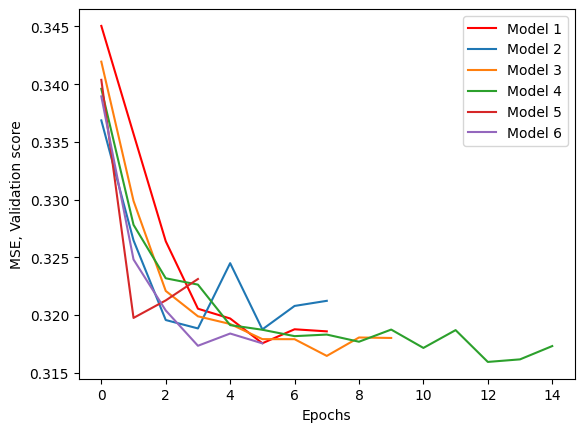

In [51]:
plt.plot(np.sqrt(model_1_trained.history['val_loss']), 'r', label='Model 1')
plt.plot(np.sqrt(model_2_trained.history['val_loss']), label='Model 2')
plt.plot(np.sqrt(model_3_trained.history['val_loss']), label='Model 3')
plt.plot(np.sqrt(model_4_trained.history['val_loss']), label='Model 4')
plt.plot(np.sqrt(model_5_trained.history['val_loss']), label='Model 5')
plt.plot(np.sqrt(model_6_trained.history['val_loss']), label='Model 6')
plt.xlabel('Epochs')
plt.ylabel('MSE, Validation score')
plt.legend()

In [52]:
print(train_acc_m1)
print(train_acc_m2)
print(train_acc_m3)
print(train_acc_m4)
print(train_acc_m5)
print(train_acc_m6)

0.8610000014305115
0.8618749976158142
0.8627499938011169
0.862500011920929
0.8612499833106995
0.8642500042915344


In [53]:
print(test_acc_m1)
print(test_acc_m2)
print(test_acc_m3)
print(test_acc_m4)
print(test_acc_m5)
print(test_acc_m6)

0.871999979019165
0.8740000128746033
0.8715000152587891
0.8725000023841858
0.8665000200271606
0.8679999709129333


In [54]:
model_7 = Sequential()
model_7.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_7.add(Dense(200, activation = 'relu'))
model_7.add(Dense(1, activation = 'tanh'))

model_7.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_7_trained = model_7.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1235 - accuracy: 0.8292 - val_loss: 0.1100 - val_accuracy: 0.8525
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.8517 - val_loss: 0.1044 - val_accuracy: 0.8587
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1035 - accuracy: 0.8612 - val_loss: 0.1033 - val_accuracy: 0.8575
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.8591 - val_loss: 0.1006 - val_accuracy: 0.8600
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.8623 - val_loss: 0.1008 - val_accuracy: 0.8569
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.8620 - val_loss: 0.1012 - val_accuracy: 0.8581


In [55]:
y_pred_m7 = model_7.predict(X_test)
print(y_pred_m7)
_, train_acc_m7 = model_7.evaluate(X_train, y_train)
_, test_acc_m7 = model_7.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m7, y_test))
print('Train: %.3f' % (train_acc_m7))
print('Test: %.3f' % (test_acc_m7))

63/63 [==============================] - 0s 1ms/step
[[0.96282935]
 [0.9093712 ]
 [0.03965279]
 ...
 [0.06785173]
 [0.02990357]
 [0.48672572]]
63/63 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.8695
0.09104010713813475
Train: 0.863
Test: 0.869


In [56]:
print(mean_squared_error(y_pred_m7, y_test))

0.09104010713813475


In [57]:
model_8 = Sequential()
model_8.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_8.add(keras.layers.Dropout(0.50))
model_8.add(Dense(200, activation = 'relu'))
model_8.add(keras.layers.Dropout(0.50))
model_8.add(Dense(1, activation = 'sigmoid'))

model_8.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_8_trained = model_8.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.1290 - accuracy: 0.8273 - val_loss: 0.1184 - val_accuracy: 0.8381
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.8422 - val_loss: 0.1118 - val_accuracy: 0.8438
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.8495 - val_loss: 0.1057 - val_accuracy: 0.8550
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.8511 - val_loss: 0.1048 - val_accuracy: 0.8569
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.8561 - val_loss: 0.1038 - val_accuracy: 0.8587
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.8584 - val_loss: 0.1029 - val_accuracy: 0.8600
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.8614 - val_loss: 0.1024 - val_accuracy: 0.8581
Epoch 

In [58]:
y_pred_m8 = model_8.predict(X_test)
print(y_pred_m8)
_, train_acc_m8 = model_8.evaluate(X_train, y_train)
_, test_acc_m8 = model_8.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m8, y_test))
print('Train: %.3f' % (train_acc_m8))
print('Test: %.3f' % (test_acc_m8))

63/63 [==============================] - 0s 1ms/step
[[0.9829078 ]
 [0.9484625 ]
 [0.00563979]
 ...
 [0.09393343]
 [0.01241044]
 [0.46046922]]
63/63 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.8675
0.09151213967006694
Train: 0.863
Test: 0.868


In [59]:
model_9 = Sequential()
model_9.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_9.add(keras.layers.Dropout(0.2))
model_9.add(Dense(200, activation = 'relu'))
model_9.add(keras.layers.Dropout(0.2))
model_9.add(Dense(1, activation = 'tanh'))

model_9.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_9_trained = model_9.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.1335 - accuracy: 0.8206 - val_loss: 0.1128 - val_accuracy: 0.8425
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.8503 - val_loss: 0.1067 - val_accuracy: 0.8562
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.8544 - val_loss: 0.1041 - val_accuracy: 0.8537
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.8598 - val_loss: 0.1019 - val_accuracy: 0.8587
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.8592 - val_loss: 0.1020 - val_accuracy: 0.8606
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.8620 - val_loss: 0.1012 - val_accuracy: 0.8587
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.8608 - val_loss: 0.1023 - val_accuracy: 0.8619
Epoch 

In [60]:
y_pred_m9 = model_9.predict(X_test)
print(y_pred_m9)
_, train_acc_m9 = model_9.evaluate(X_train, y_train)
_, test_acc_m9 = model_9.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m9, y_test))
print('Train: %.3f' % (train_acc_m9))
print('Test: %.3f' % (test_acc_m9))

63/63 [==============================] - 0s 1ms/step
[[0.9869632 ]
 [0.9288578 ]
 [0.0038954 ]
 ...
 [0.14486608]
 [0.02407499]
 [0.5177367 ]]
63/63 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.8715
0.0933068177977575
Train: 0.863
Test: 0.872


In [61]:
model_10 = Sequential()
model_10.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_10.add(keras.layers.BatchNormalization())
model_10.add(Dense(200, activation = 'relu'))
model_10.add(keras.layers.BatchNormalization())
model_10.add(Dense(1, activation = 'tanh'))

model_10.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_10_trained = model_10.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 2s 3ms/step - loss: 0.2131 - accuracy: 0.8028 - val_loss: 0.2130 - val_accuracy: 0.5263
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.8502 - val_loss: 0.1242 - val_accuracy: 0.8606
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1195 - accuracy: 0.8459 - val_loss: 0.1169 - val_accuracy: 0.8556
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.8530 - val_loss: 0.1251 - val_accuracy: 0.8512
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.8523 - val_loss: 0.1055 - val_accuracy: 0.8600
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1191 - accuracy: 0.8462 - val_loss: 0.1014 - val_accuracy: 0.8575
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.8523 - val_loss: 0.1106 - val_accuracy: 0.8531
Epoch 

In [62]:
y_pred_m10 = model_10.predict(X_test)
print(y_pred_m10)
_, train_acc_m10 = model_10.evaluate(X_train, y_train)
_, test_acc_m10 = model_10.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m10, y_test))
print('Train: %.3f' % (train_acc_m10))
print('Test: %.3f' % (test_acc_m10))

63/63 [==============================] - 0s 1ms/step
[[ 0.97500676]
 [ 0.91045517]
 [-0.15555272]
 ...
 [-0.03203357]
 [ 0.17469144]
 [ 0.5578284 ]]
63/63 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.8735
0.10175146108139725
Train: 0.863
Test: 0.873


In [63]:
model_11 = Sequential()
model_11.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_11.add(keras.layers.Dropout(0.2))
model_11.add(Dense(200, activation = 'relu'))
model_11.add(Dense(1, activation = 'sigmoid'))

model_11.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_11_trained = model_11.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.8336 - val_loss: 0.1137 - val_accuracy: 0.8369
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.8492 - val_loss: 0.1047 - val_accuracy: 0.8569
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.8592 - val_loss: 0.1023 - val_accuracy: 0.8587
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.8606 - val_loss: 0.1013 - val_accuracy: 0.8600
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.8606 - val_loss: 0.1007 - val_accuracy: 0.8587
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.8602 - val_loss: 0.1012 - val_accuracy: 0.8581
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.8622 - val_loss: 0.1046 - val_accuracy: 0.8531


In [64]:
y_pred_m11 = model_11.predict(X_test)
print(y_pred_m11)
_, train_acc_m11 = model_11.evaluate(X_train, y_train)
_, test_acc_m11 = model_11.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m11, y_test))
print('Train: %.3f' % (train_acc_m11))
print('Test: %.3f' % (test_acc_m11))

63/63 [==============================] - 0s 1ms/step
[[0.9842979 ]
 [0.91451836]
 [0.00578912]
 ...
 [0.13427132]
 [0.01630467]
 [0.5868377 ]]
63/63 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.8655
0.09471568287808341
Train: 0.857
Test: 0.865


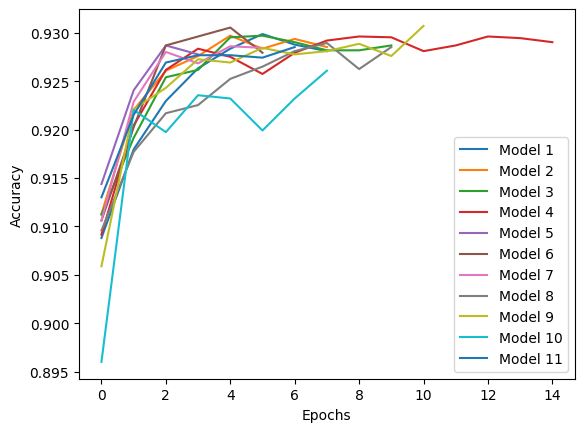

In [65]:
plt.plot(np.sqrt(model_1_trained.history['accuracy']), label='Model 1')
plt.plot(np.sqrt(model_2_trained.history['accuracy']), label='Model 2')
plt.plot(np.sqrt(model_3_trained.history['accuracy']), label='Model 3')
plt.plot(np.sqrt(model_4_trained.history['accuracy']), label='Model 4')
plt.plot(np.sqrt(model_5_trained.history['accuracy']), label='Model 5')
plt.plot(np.sqrt(model_6_trained.history['accuracy']), label='Model 6')
plt.plot(np.sqrt(model_7_trained.history['accuracy']), label='Model 7')
plt.plot(np.sqrt(model_8_trained.history['accuracy']), label='Model 8')
plt.plot(np.sqrt(model_9_trained.history['accuracy']), label='Model 9')
plt.plot(np.sqrt(model_10_trained.history['accuracy']), label='Model 10')
plt.plot(np.sqrt(model_11_trained.history['accuracy']), label='Model 11')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [66]:
print(mean_squared_error(y_pred_m6, y_test))
print(mean_squared_error(y_pred_m7, y_test))
print(mean_squared_error(y_pred_m8, y_test))
print(mean_squared_error(y_pred_m9, y_test))
print(mean_squared_error(y_pred_m10, y_test))
print(mean_squared_error(y_pred_m11, y_test))

0.09135069241281973
0.09104010713813475
0.09151213967006694
0.0933068177977575
0.10175146108139725
0.09471568287808341


In [67]:
model_12 = Sequential()
model_12.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_12.add(Dense(200, activation = 'relu'))
model_12.add(Dense(1, activation = 'tanh'))

model_12.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_12_trained = model_12.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.8020 - val_loss: 0.3981 - val_accuracy: 0.8363
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8433 - val_loss: 0.4446 - val_accuracy: 0.8512
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8497 - val_loss: 0.3581 - val_accuracy: 0.8525
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8441 - val_loss: 0.3706 - val_accuracy: 0.8569
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.8000 - val_loss: 0.6064 - val_accuracy: 0.7006


In [68]:
y_pred_m12 = model_12.predict(X_test)
print(y_pred_m12)
_, train_acc_m12 = model_12.evaluate(X_train, y_train)
_, test_acc_m12 = model_12.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m12, y_test))
print('Train: %.3f' % (train_acc_m12))
print('Test: %.3f' % (test_acc_m12))

63/63 [==============================] - 0s 1ms/step
[[ 0.97552633]
 [ 0.98186463]
 [-0.27530357]
 ...
 [ 0.7037812 ]
 [ 0.23448755]
 [ 0.57467395]]
63/63 [==============================] - 0s 1ms/step - loss: 0.5859 - accuracy: 0.6840
0.2006955457412349
Train: 0.687
Test: 0.684


In [69]:
model_13 = Sequential()
model_13.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_13.add(Dense(200, activation = 'relu'))
model_13.add(Dense(1, activation = 'tanh'))

model_13.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_13_trained = model_13.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.4852 - accuracy: 0.7859 - val_loss: 0.3979 - val_accuracy: 0.8294
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8363 - val_loss: 0.3785 - val_accuracy: 0.8350
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8122 - val_loss: 0.3999 - val_accuracy: 0.8350
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8378 - val_loss: 0.3660 - val_accuracy: 0.8356
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8289 - val_loss: 0.7017 - val_accuracy: 0.5412
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7917 - val_loss: 0.3686 - val_accuracy: 0.8356


In [70]:
y_pred_m13 = model_13.predict(X_test)
print(y_pred_m13)
_, train_acc_m13 = model_13.evaluate(X_train, y_train)
_, test_acc_m13 = model_13.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m13, y_test))
print('Train: %.3f' % (train_acc_m13))
print('Test: %.3f' % (test_acc_m13))

63/63 [==============================] - 0s 1ms/step
[[ 0.9546439 ]
 [ 0.8721749 ]
 [-0.02824726]
 ...
 [ 0.11543515]
 [ 0.05582276]
 [ 0.2861539 ]]
63/63 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8500
0.10508262593720868
Train: 0.839
Test: 0.850


In [71]:
model_14 = Sequential()
model_14.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model_14.add(Dense(200, activation = 'relu'))
model_14.add(Dense(1, activation = 'tanh'))

model_14.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)
model_14_trained = model_14.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.1685 - accuracy: 0.7597 - val_loss: 0.1381 - val_accuracy: 0.8050
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.8219 - val_loss: 0.1265 - val_accuracy: 0.8275
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.8336 - val_loss: 0.1222 - val_accuracy: 0.8325
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1181 - accuracy: 0.8372 - val_loss: 0.1202 - val_accuracy: 0.8344
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.8395 - val_loss: 0.1195 - val_accuracy: 0.8375
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.8395 - val_loss: 0.1180 - val_accuracy: 0.8344
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.8394 - val_loss: 0.1178 - val_accuracy: 0.8381
Epoch 

In [72]:
y_pred_m14 = model_14.predict(X_test)
print(y_pred_m14)
_, train_acc_m14 = model_14.evaluate(X_train, y_train)
_, test_acc_m14 = model_14.evaluate(X_test, y_test)
print(mean_squared_error(y_pred_m14, y_test))
print('Train: %.3f' % (train_acc_m14))
print('Test: %.3f' % (test_acc_m14))

63/63 [==============================] - 0s 1ms/step
[[ 9.5807886e-01]
 [ 8.3245254e-01]
 [-3.9887428e-04]
 ...
 [ 7.3230214e-02]
 [ 1.1093994e-02]
 [ 3.9881292e-01]]
63/63 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.8595
0.0980486570342126
Train: 0.855
Test: 0.859


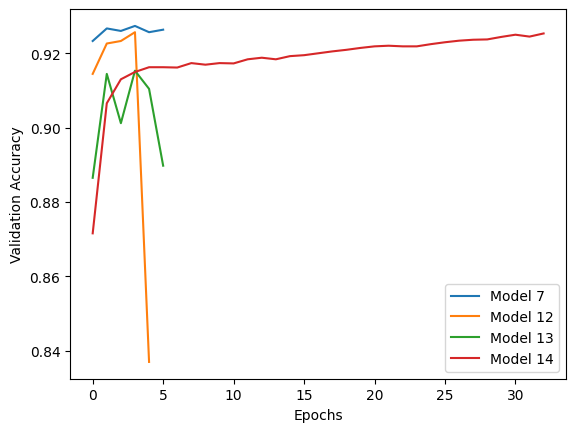

In [73]:
plt.plot(np.sqrt(model_7_trained.history['val_accuracy']), label='Model 7')
plt.plot(np.sqrt(model_12_trained.history['val_accuracy']), label='Model 12')
plt.plot(np.sqrt(model_13_trained.history['accuracy']), label='Model 13')
plt.plot(np.sqrt(model_14_trained.history['accuracy']), label='Model 14')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

In [74]:
print(mean_squared_error(y_pred_m7, y_test))
print(mean_squared_error(y_pred_m12, y_test))
print(mean_squared_error(y_pred_m13, y_test))
print(mean_squared_error(y_pred_m14, y_test))

0.09104010713813475
0.2006955457412349
0.10508262593720868
0.0980486570342126


In [75]:
import keras_tuner
import tensorflow as tf
from tensorflow import keras

In [76]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(n_cols, )))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=5, max_value=200, step=5)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE),
                metrics=['accuracy'])

    return model

In [77]:
tuner = keras_tuner.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     overwrite=True)

In [78]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [79]:
tuner.search(X_train, y_train, epochs=6, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 00m 04s]
val_accuracy: 0.8631250262260437

Best val_accuracy So Far: 0.8643749952316284
Total elapsed time: 00h 01m 06s
INFO:tensorflow:Oracle triggered exit


In [80]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [81]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.1198 - accuracy: 0.8359 - val_loss: 0.1112 - val_accuracy: 0.8456
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.8533 - val_loss: 0.1022 - val_accuracy: 0.8606
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1028 - accuracy: 0.8586 - val_loss: 0.1031 - val_accuracy: 0.8600
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.8584 - val_loss: 0.1055 - val_accuracy: 0.8556
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.8616 - val_loss: 0.1023 - val_accuracy: 0.8594
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.8611 - val_loss: 0.1017 - val_accuracy: 0.8606
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.8611 - val_loss: 0.1015 - val_accuracy: 0.8562
Epoch 

In [82]:
hypermodel = tuner.hypermodel.build(best_hps)

In [83]:
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/15
200/200 [==============================] - 1s 2ms/step - loss: 0.1167 - accuracy: 0.8380 - val_loss: 0.1113 - val_accuracy: 0.8444
Epoch 2/15
200/200 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.8536 - val_loss: 0.1019 - val_accuracy: 0.8625
Epoch 3/15
200/200 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.8595 - val_loss: 0.1024 - val_accuracy: 0.8569
Epoch 4/15
200/200 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.8605 - val_loss: 0.1027 - val_accuracy: 0.8587
Epoch 5/15
200/200 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.8591 - val_loss: 0.1022 - val_accuracy: 0.8575
Epoch 6/15
200/200 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.8611 - val_loss: 0.1050 - val_accuracy: 0.8556
Epoch 7/15
200/200 [==============================] - 0s 2ms/step - loss: 0.1014 - accuracy: 0.8625 - val_loss: 0.1020 - val_accuracy: 0.8581
Epoch 

In [84]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

63/63 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.8660
[test loss, test accuracy]: [0.09498976916074753, 0.8659999966621399]
